In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import pandas as pd
import gc
import os
import json
from pathlib import Path
from os.path import join as path_join
import matplotlib.pyplot as plt

In [4]:
def load_dataset(path, max_samples_per_class=1000):
    df = pd.read_parquet(path)\
            [["code", "target"]]\
            .reset_index()\
            [["code", "tglang", "target"]]\
            .reset_index()\
            .groupby("tglang")\
            .apply(
                lambda x: x[["target", "code"]].sample(n=min(max_samples_per_class, x.shape[0]), random_state=137)
            )\
            .reset_index()\
            [["code", "tglang", "target"]]
    return df

In [5]:
from pathlib import Path

keywords_root = Path("../dataset_v1/data/raw/keywords")

keywords = []

for tglang_keywords in keywords_root.iterdir():
    tglang = tglang_keywords.name.split(".")[0]
    with open(tglang_keywords) as f:
        keywords += list(map(lambda x: x.strip(), f.readlines()))

keywords = list(set(keywords))
keywords_set = set(keywords)

print(keywords)
print(len(keywords))

['async', 'ref', '$limit_rate', 'while', 'line-height', '@font-face', 'INNER', 'extern', '$upstream_cache_status', 'border-inline-end', '$limit_req_status', '#file', '$limit_conn_status', 'column-fill', 'none', '#endif', 'text-transform', 'EXISTS', 'ulongint', 'background-position-y', '$connections_writing', '__int32', 'reinterpret_cast', '$tcpinfo_rtt', '&&', 'border-left-style', '#sourceLocation', 'max-height', 'clone', 'border-top-left-radius', 'retain', '$proxy_protocol_addr', 'atomic_noexcept', 'inset-block', '$content_type', 'text-decoration-thickness', '$connections_active', '__METHOD__', 'typeid', 'border-left-width', 'constructor', 'undef', 'param', 'bitor', '$proxy_protocol_tlv_gcp_conn_id', 'DROP', 'library', '<label', 'die', 'wend', '$server_protocol', 'SET', 'endswitch', 'culngint', 'mask-origin', 'lua_dump', 'LIMIT', 'enum', '<optgroup', 'where', 'column-rule', '$otel_parent_id', 'LABEL', 'border-bottom-style', 'become', 'REPLACE', '$request_completion', 'text-decoration'

In [6]:
from pathlib import Path

keywords2_root = Path("../dataset_v1/data/raw/keywords2")

keywords2 = []

for tglang_keywords2 in keywords2_root.iterdir():
    tglang = tglang_keywords2.name.split(".")[0]
    with open(tglang_keywords2) as f:
        keywords2 += list(map(lambda x: x.strip(), f.readlines()))

keywords2 = list(set(keywords2))
keywords2_set = set(keywords2)

print(keywords2)
print(len(keywords2))

['ssl_client_verify', 'prefix', 'init', 'async', 'ref', 'xor', 'date_gmt', 'html', 'caret', 'desc', '__pin', 'orientation', 'pragma', 'COLUMN', 'filePath', '__delegate', 'while', 'family', 'eval', 'bidi', 'document_root', 'bytes', '__nogc', '__sptre', 'colorLiteral', 'qword', 'lua_isnumber', 'start', 'ul', 'cbyte', 'exit', 'namespace', 'view', 'ENTRYPOINT', 'primary', 'overflow', '__int16', 'noinline', 'anchor', 'noexcept', 'ALL', 'HAVING', 'main', 'east', 'set', 'limit_rate', 'yield', 'summary', 'INNER', 'file', 'uint', 'extern', 'geoip_city_continent_code', 'request_body', 'chan', 'cshort', 'AS', 'esac', 'paint', 'thickness', 'val', 'underline', 'cite', 'bdo', 'ALTER', 'constraint', 'left', 'deinit', 'vararg', 'none', 'geoip_region_name', 'z', 'height', 'ssl_client_fingerprint', 'EXISTS', 'ulongint', 'readwrite', 'endfor', 'lua_CFunction', 'result', 'font', 'unicode', 'reified', 'value struct', 'factory', 'geoip_longitude', 'attachment', '__int32', 'managed', 'widows', 'reinterpret_c

In [7]:
dataset_path = Path("../dataset_v1/data/tglang_dataset/tglang_dataset_v2.parquet")

In [8]:
dataset = load_dataset(dataset_path, 5000)
dataset.shape

(99365, 3)

In [9]:
for idx, row in dataset[["tglang", "code"]].sample(n = 10).iterrows():
    print("-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-")
    print("")
    print(row["tglang"])
    print("")
    print(row["code"])

-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-

TGLANG_LANGUAGE_SWIFT

func repeat(n: Int, f: () -> ()) {
  for _ in 0..<n {
    f()
  }
}
 
repeat(4) { println("Example") }
-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-

TGLANG_LANGUAGE_SWIFT

import Cocoa
 
var found = false
let fh = NSFileHandle.fileHandleWithStandardInput()
println("Enter an integer between 1 and 100 for me to guess: ")
let data = fh.availableData
var num:Int!
var low = 0.0
var high = 100.0
var lastGuess:Double!
 
 
if let numFromData = NSString(data: data, encoding: NSUTF8StringEncoding)?.intValue {
    num = Int(numFromData)
}
 
func guess() -> Double? {
    if (high - low == 1) {
        println("I can't guess it. I think you cheated.");
        return nil
    }
 
    return floor((low + high) / 2)
}
 
while (!found) {
    if let guess = guess() {
        lastGuess = guess
 
    } else {
        break
    }
    println("My guess is: \(Int(lastGuess))")
    println("How was my guess? Enter \"higher\" if it was higher, \"lower\" if it was lo

In [10]:
target_2_lang = {}
for idx, row in dataset[["target", "tglang"]].drop_duplicates().iterrows():
    target_2_lang[row["target"]] = row["tglang"]
target_2_lang

{1: 'TGLANG_LANGUAGE_C',
 2: 'TGLANG_LANGUAGE_CPLUSPLUS',
 3: 'TGLANG_LANGUAGE_CSHARP',
 4: 'TGLANG_LANGUAGE_CSS',
 5: 'TGLANG_LANGUAGE_DART',
 6: 'TGLANG_LANGUAGE_DOCKER',
 7: 'TGLANG_LANGUAGE_FUNC',
 8: 'TGLANG_LANGUAGE_GO',
 9: 'TGLANG_LANGUAGE_HTML',
 10: 'TGLANG_LANGUAGE_JAVA',
 11: 'TGLANG_LANGUAGE_JAVASCRIPT',
 12: 'TGLANG_LANGUAGE_JSON',
 13: 'TGLANG_LANGUAGE_KOTLIN',
 14: 'TGLANG_LANGUAGE_LUA',
 15: 'TGLANG_LANGUAGE_NGINX',
 16: 'TGLANG_LANGUAGE_OBJECTIVE_C',
 0: 'TGLANG_LANGUAGE_OTHER',
 17: 'TGLANG_LANGUAGE_PHP',
 18: 'TGLANG_LANGUAGE_POWERSHELL',
 19: 'TGLANG_LANGUAGE_PYTHON',
 20: 'TGLANG_LANGUAGE_RUBY',
 21: 'TGLANG_LANGUAGE_RUST',
 22: 'TGLANG_LANGUAGE_SHELL',
 23: 'TGLANG_LANGUAGE_SOLIDITY',
 24: 'TGLANG_LANGUAGE_SQL',
 25: 'TGLANG_LANGUAGE_SWIFT',
 26: 'TGLANG_LANGUAGE_TL',
 27: 'TGLANG_LANGUAGE_TYPESCRIPT',
 28: 'TGLANG_LANGUAGE_XML'}

In [11]:
d = []
for target, tglang in target_2_lang.items():
    d.append((target, tglang))

tglang_names = list(map(lambda x: x[1], sorted(d)))

In [12]:
dataset.head(3)

,code,tglang,target
0,// Compute the theoretical curve:\n MASWA_t...,TGLANG_LANGUAGE_C,1
1,#include <stdlib.h> /* for qsort */\n#include...,TGLANG_LANGUAGE_C,1
2,"case 1:\n strcpy(suffix, ""st"");\n ...",TGLANG_LANGUAGE_C,1


In [13]:
dataset["tglang"].value_counts()

tglang
TGLANG_LANGUAGE_PYTHON         4575
TGLANG_LANGUAGE_GO             4544
TGLANG_LANGUAGE_C              4469
TGLANG_LANGUAGE_RUBY           4427
TGLANG_LANGUAGE_JAVA           4421
TGLANG_LANGUAGE_CPLUSPLUS      4410
TGLANG_LANGUAGE_KOTLIN         4407
TGLANG_LANGUAGE_LUA            4192
TGLANG_LANGUAGE_JAVASCRIPT     4132
TGLANG_LANGUAGE_PHP            3853
TGLANG_LANGUAGE_RUST           3791
TGLANG_LANGUAGE_POWERSHELL     3777
TGLANG_LANGUAGE_SWIFT          3776
TGLANG_LANGUAGE_SHELL          3435
TGLANG_LANGUAGE_CSS            3411
TGLANG_LANGUAGE_DART           3342
TGLANG_LANGUAGE_SQL            3330
TGLANG_LANGUAGE_JSON           3320
TGLANG_LANGUAGE_XML            3313
TGLANG_LANGUAGE_HTML           3211
TGLANG_LANGUAGE_SOLIDITY       3197
TGLANG_LANGUAGE_TYPESCRIPT     3047
TGLANG_LANGUAGE_DOCKER         2992
TGLANG_LANGUAGE_CSHARP         2936
TGLANG_LANGUAGE_OBJECTIVE_C    2767
TGLANG_LANGUAGE_NGINX          2440
TGLANG_LANGUAGE_OTHER          1963
TGLANG_LANGUAGE_TL   

In [14]:
data_2_add = []

tgother_path = Path("../dataset_v1/data/raw/ml2023-r1-dataset")

for tgother_subfolder in tgother_path.iterdir():
    if tgother_subfolder.is_dir():
        subfolder = tgother_subfolder.name

        for tgother_file in Path(path_join(tgother_path, subfolder)).iterdir():
            if "CODE" in tgother_file.name:
                with open(tgother_file) as f:
                    data_2_add.append([f.read(), "TGLANG_LANGUAGE_OTHER", 0])

tgother_dataset = pd.DataFrame(data_2_add, columns=["code", "tglang", "target"])
print("Tg other dataset info")
print(tgother_dataset.columns)
print(tgother_dataset.shape)
print(len(tgother_dataset["tglang"].unique()))
print(tgother_dataset["tglang"].value_counts())

tgother_dataset["len"] = tgother_dataset["code"].str.len()
tgother_dataset.describe()

Tg other dataset info
Index(['code', 'tglang', 'target'], dtype='object')
(1969, 3)
1
tglang
TGLANG_LANGUAGE_OTHER    1969
Name: count, dtype: int64


,target,len
count,1969.0,1969.000000
mean,0.0,361.156425
std,0.0,572.913545
min,0.0,6.000000
25%,0.0,60.000000
50%,0.0,143.000000
75%,0.0,405.000000
max,0.0,4081.000000


<AxesSubplot:>

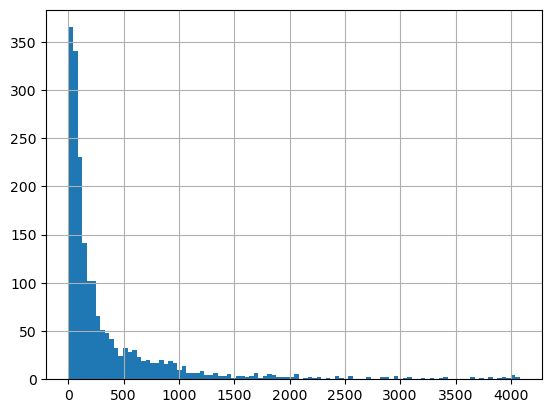

In [15]:
tgother_dataset[tgother_dataset["len"] <= 4096]["len"].hist(bins = 100)

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import statistics 
from numpy import random

mean = statistics.mean(tgother_dataset["len"]) / 20
sd = statistics.stdev(tgother_dataset["len"]) / 5

# plt.plot(tgother_dataset["len"], norm.pdf(tgother_dataset["len"], mean, sd)) 
# plt.show()

weights = norm.pdf([i for i in range(1, 4096)], mean, sd)

for i in range(len(weights)):
    weights[i] += 0.0002 - min((i / 10000000), 0.0001999999)

for i in range(20):
    weights[i] /= ((20 - i) / 1)

weights = weights / np.sum(weights)

In [17]:
random.choice([i for i in range(1, 4096)] , 1, p=weights)[0]

44

202.3359990493742


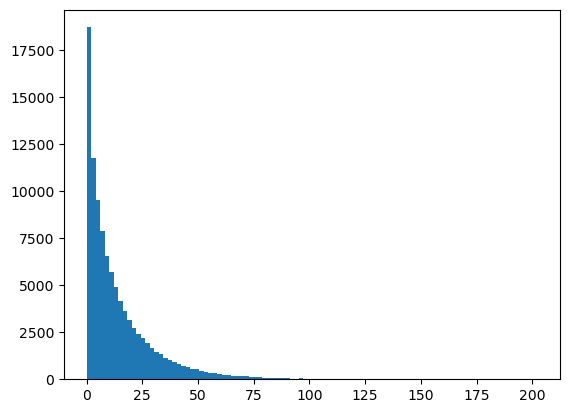

In [18]:
from numpy import random

sample_n = 100000

lengths_dist = list(map(lambda x: max(x, 6), random.choice([i for i in range(1, 4096)] , sample_n, p=weights)))

alpha = 0.773738430384898
beta = 18.32303224320533

lengths_dist = [
    min(np.random.gamma(alpha, beta), 4096) for i in range(sample_n)
]

print(max(lengths_dist))

plt.hist(lengths_dist, bins = 100)
plt.show()

<AxesSubplot:title={'center':'Mean length'}, xlabel='tglang'>

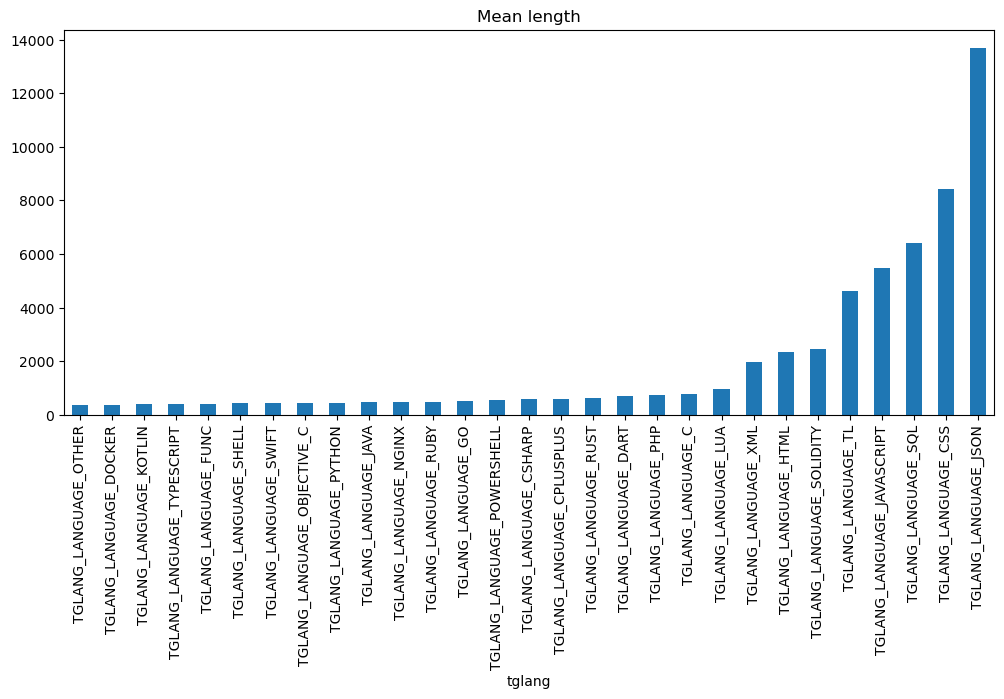

In [19]:
dataset.groupby("tglang").apply(lambda x: x["code"].str.len().mean())\
    .sort_values()\
    .plot(title="Mean length", x='tglang', kind='bar', figsize=(12, 5), rot=90)

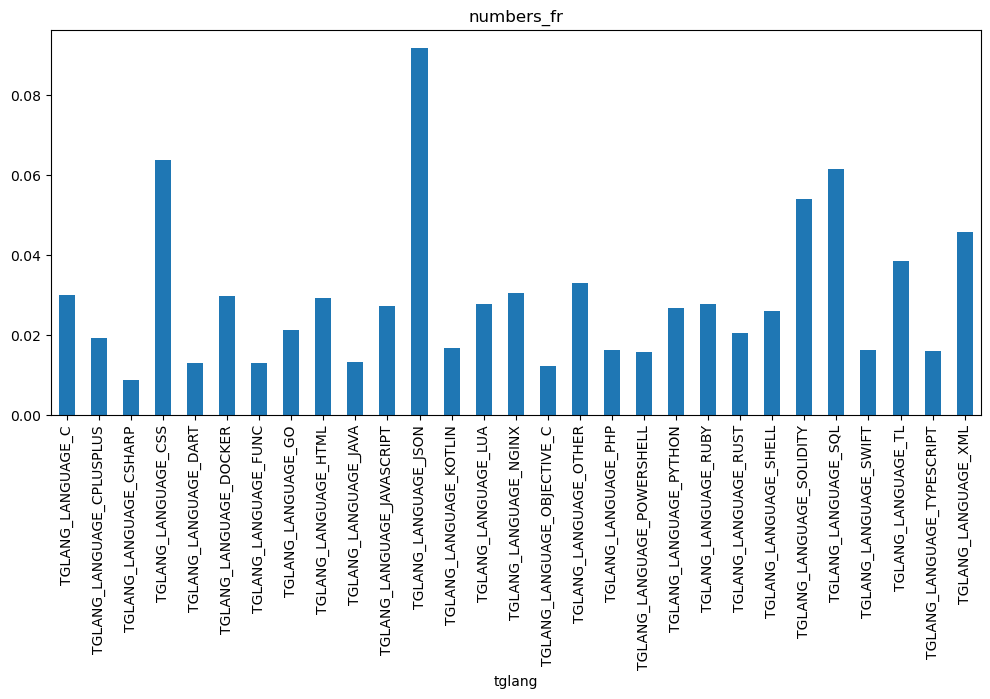

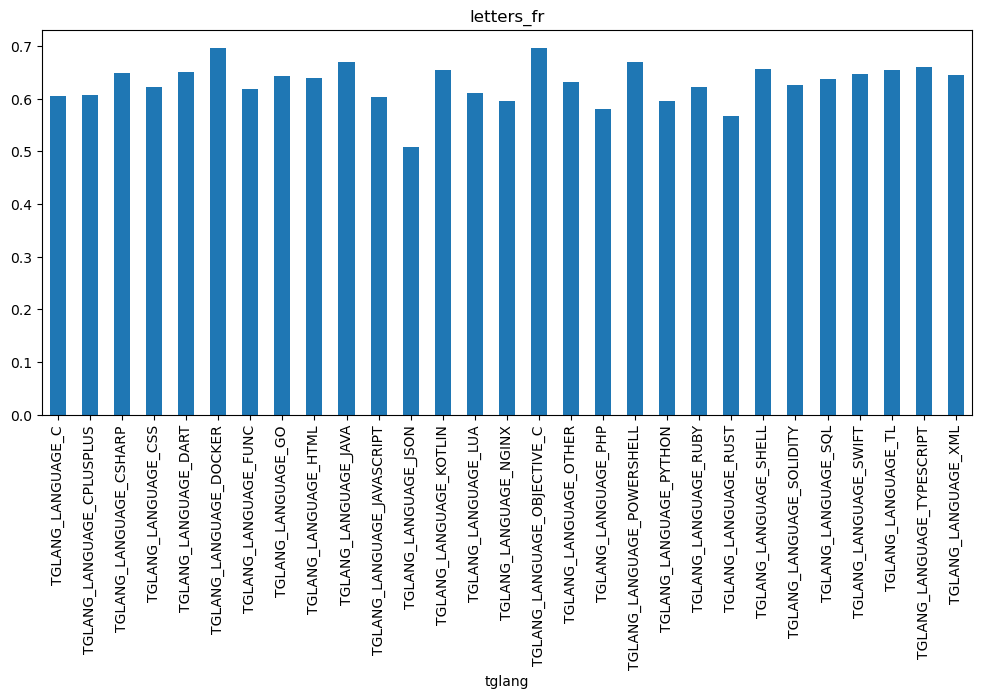

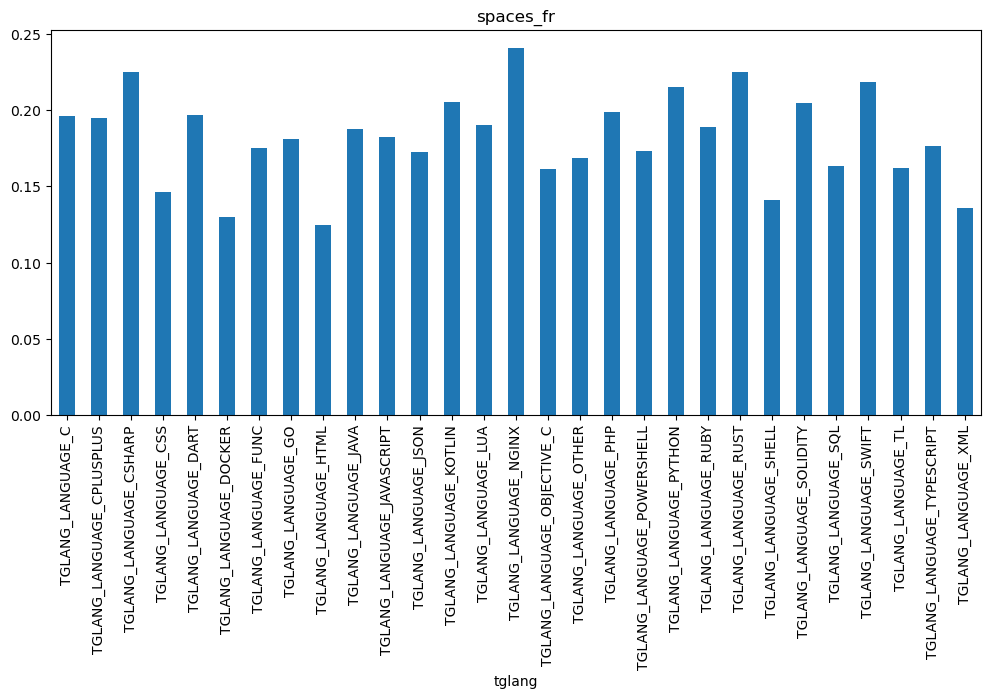

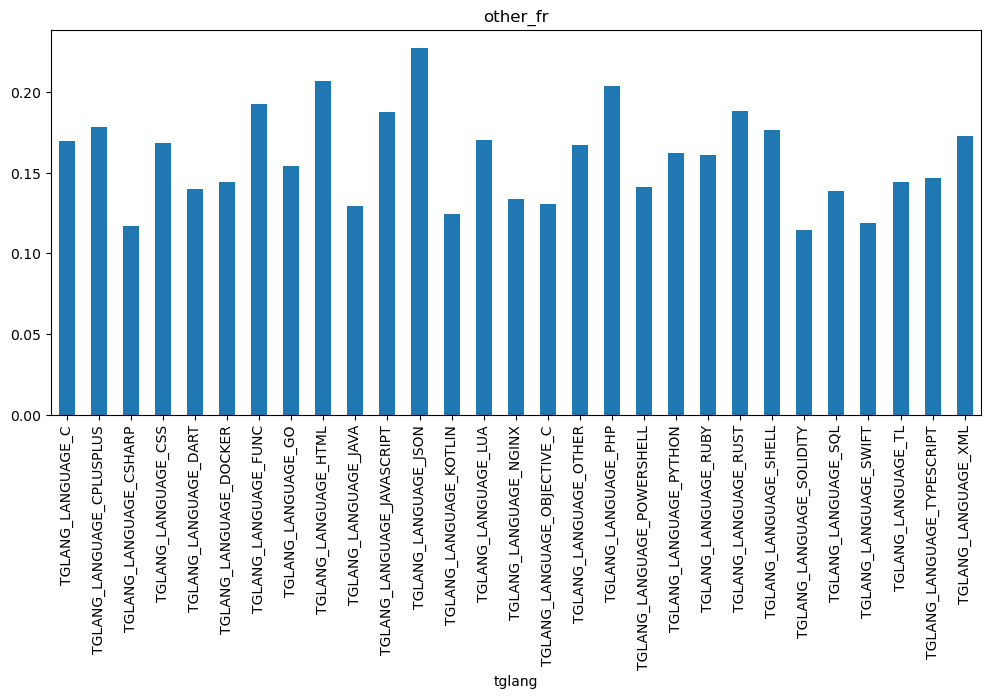

In [20]:
alphnum = dataset
alphnum["total"] = alphnum["code"].str.len()
alphnum["numbers"] = alphnum["code"].apply(lambda s: sum(c.isdigit() for c in s))
alphnum["letters"] = alphnum["code"].apply(lambda s: sum(c.isalpha() for c in s))
alphnum["spaces"] = alphnum["code"].apply(lambda s: sum(c.isspace() for c in s))
alphnum["other"] = alphnum["code"].apply(lambda s: sum(not(c.isspace() or c.isalpha() or c.isdigit()) for c in s))

alphnum["numbers_fr"] = alphnum["numbers"] / alphnum["total"]
alphnum["letters_fr"] = alphnum["letters"] / alphnum["total"]
alphnum["spaces_fr"] = alphnum["spaces"] / alphnum["total"]
alphnum["other_fr"] = alphnum["other"] / alphnum["total"]

for column in ["numbers_fr", "letters_fr", "spaces_fr", "other_fr"]:
    alphnum.groupby("tglang").apply(lambda x: x[column].mean())\
        .plot(title=column, x='tglang', kind='bar', figsize=(12, 5), rot=90)
    plt.show()

In [21]:
print("keywords total:", len(keywords))

import re

s = dataset[dataset["total"] <= 100].sample(n=1)["code"].values[0]

# s = """
# #include <iostream>
# using namespace std;

# int main() 
# {
#     int exponent;
#     float base, result = 1;

#     cout << "Enter base and exponent respectively:  ";
#     cin >> base >> exponent;

#     cout << base << "^" << exponent << " = ";

#     while (exponent != 0) {
#         result *= base;
#         --exponent;
#     }

#     cout << result;
    
#     return 0;
# }

# Class.class2
# """

# chars = list(sorted(map(lambda x: (ord(x), x), """!#$%&*+:-./<=>?@\\^_|~""")))

# for c in chars:
#     print(c[0], c[1])
# print("-=-=-=-==-=")

# chars = list(sorted(map(lambda x: (ord(x), x), """ \t\n(),;{}[]`"'""")))

# for c in chars:
#     print(c[0], c[1])

def my_tokenizer(s):
    single_token_ids  = set([9,10,32,34,39,40,41,44,59,91,93,96,123,125])
    word_ids          = set(list(range(65, 91)) + list(range(97, 123)) + [95])
    number_ids        = set(list(range(48, 58)))
    symbol_ids        = set([33,35,36,37,38,42,43,45,46,47,58,60,61,62,63,64,92,94,95,124,126])
    
    tokens = []
    cache = []
    token_type = 0
    
    for idx, c in enumerate(s):
        id = ord(c)
    
        if id in single_token_ids:

            if len(cache) > 0 and (token_type == 1 or token_type == 2 or token_type == 3):
                tokens.append("".join(cache))
            cache = []
            tokens.append(c)
            token_type = 0

        elif id in word_ids or (token_type == 1 and id in number_ids):

            if token_type == 0:
                cache = [c]
            elif token_type == 1:
                cache.append(c)
            elif token_type == 2:
                tokens.append("".join(cache))
                cache = [c]
            elif token_type == 3:
                tokens.append("".join(cache))
                cache = [c]
            token_type = 1

        elif id in symbol_ids:

            if token_type == 0:
                cache = [c]
            elif token_type == 1:
                tokens.append("".join(cache))
                cache = [c]
            elif token_type == 2:
                cache.append(c)
            elif token_type == 3:
                tokens.append("".join(cache))
                cache = [c]
            token_type = 2

        elif id in number_ids:

            if token_type == 0:
                cache = [c]
            elif token_type == 1:
                tokens.append("".join(cache))
                cache = [c]
            elif token_type == 2:
                tokens.append("".join(cache))
                cache = [c]
            elif token_type == 3:
                cache.append(c)
            token_type = 3

        else:
            if len(cache) > 0 and (token_type == 1 or token_type == 2 or token_type == 3):
                tokens.append("".join(cache))
            cache = []
            token_type = 0

        # print(c, id, cache)

    if len(cache) > 0 and (token_type == 1 or token_type == 2 or token_type == 3):
        tokens.append("".join(cache))

    return tokens

def filter_tokens(tokens):
    return list(filter(lambda x: x != " " and x != "", tokens))

print(s)

result = re.split(r"""(\b[A-Za-z_]\w*\b|[!\#\$%\&\*\+:\-\./<=>\?@\\\^_\|\~]+|[ \t\(\),;\{\}\[\]`"'])""", s)
print(filter_tokens(result))
print(filter_tokens(my_tokenizer(s)))

keywords total: 1322
module.exports = { extends: ['@commitlint/config-angular'] }
['module', '.', 'exports', '=', '{', 'extends', ':', '[', "'", '@', 'commitlint', '/', 'config', '-', 'angular', "'", ']', '}']
['module', '.', 'exports', '=', '{', 'extends', ':', '[', "'", '@', 'commitlint', '/', 'config', '-', 'angular', "'", ']', '}']


In [22]:
test_n = 10

for i in range(0, test_n):
    s = dataset[dataset["total"] <= 100].sample(n=1)["code"].values[0]

    result = re.split(r"""(\b[A-Za-z_]\w*\b|[!\#\$%\&\*\+:\-\./<=>\?@\\\^_\|\~]+|[ \t\(\),;\{\}\[\]`"'])""", s)

    target = filter_tokens(result)
    predict = filter_tokens(my_tokenizer(s))

    print("----Test:", i)

    if len(target) != len(predict):
        print(s)
        print(target)
        print(predict)
        continue

    for i in range(len(target)):
        if target[i] != predict[i]:
            print(s)
            print(target)
            print(predict)

----Test: 0
----Test: 1
----Test: 2
hasRouteEntry = hasRoute->GetEntry(j);
                    hasRouteEntry->SetRloc(0xfffe);
['hasRouteEntry', '=', 'hasRoute', '->', 'GetEntry', '(', 'j', ')', ';', '\n', 'hasRouteEntry', '->', 'SetRloc', '(', '0xfffe', ')', ';']
['hasRouteEntry', '=', 'hasRoute', '->', 'GetEntry', '(', 'j', ')', ';', '\n', 'hasRouteEntry', '->', 'SetRloc', '(', '0', 'xfffe', ')', ';']
----Test: 3
----Test: 4
----Test: 5
----Test: 6
----Test: 7
----Test: 8
TraceBuffer[0] = 123u;
        TraceBuffer[1] = 321u;
        return 2u;
['TraceBuffer', '[', '0', ']', '=', '123u', ';', '\n', 'TraceBuffer', '[', '1', ']', '=', '321u', ';', '\n', 'return', '2u', ';']
['TraceBuffer', '[', '0', ']', '=', '123', 'u', ';', '\n', 'TraceBuffer', '[', '1', ']', '=', '321', 'u', ';', '\n', 'return', '2', 'u', ';']
----Test: 9


In [23]:
"""

Нужно подобрать охуенные токены

"""

import numpy as np
import math
from pathlib import Path
import matplotlib.pyplot as plt

keywords_root = Path("../dataset_v1/data/raw/keywords")
keywords = []

tglangs_list = dataset["tglang"].unique()

best_keywords = []

for tglang_keywords in keywords_root.iterdir():
    tglang = tglang_keywords.name.split(".")[0]
    with open(tglang_keywords) as f:
        tglang_keywords = list(set(map(lambda x: x.strip(), f.readlines())))

    print(tglang)

    x = []
    y = []

    code = dataset[dataset["tglang"] == tglang]["code"].to_list()
    anti_code = dataset[dataset["tglang"] != tglang]["code"].to_list()

    # fig, ax = plt.subplots(figsize=(16, 6))

    for keyword in tglang_keywords:
        count_n = 0
        for i in code:
            if keyword in i:
                count_n += 1

        anti_code_n = 0
        for i in anti_code:
            if keyword in i:
                anti_code_n += 1

        if count_n >= 5:
            x.append(keyword)
            y.append(count_n / (anti_code_n + count_n))

    data = zip(y, x)
    data = list(sorted(data, reverse=True))

    best_keywords_lang = list(map(lambda d: d[1], filter(lambda d: d[0] >= 0.1, data)))
    best_keywords += best_keywords_lang

    x = list(map(lambda d: d[1], data))
    y = list(map(lambda d: d[0], data))

    # ax.plot(x, y, alpha=1, color="blue")
    # ax.set_xticklabels(x, rotation=45, rotation_mode="anchor", ha="right")

    # plt.show()

best_keywords = list(set(best_keywords))

print(best_keywords)
print(len(best_keywords))

TGLANG_LANGUAGE_RUBY
TGLANG_LANGUAGE_JSON
TGLANG_LANGUAGE_KOTLIN
TGLANG_LANGUAGE_OBJECTIVE_C
TGLANG_LANGUAGE_SHELL
TGLANG_LANGUAGE_TYPESCRIPT
TGLANG_LANGUAGE_CSHARP
TGLANG_LANGUAGE_CSS
TGLANG_LANGUAGE_PHP
TGLANG_LANGUAGE_JAVA
TGLANG_LANGUAGE_RUST
TGLANG_LANGUAGE_JAVASCRIPT
TGLANG_LANGUAGE_SOLIDITY
TGLANG_LANGUAGE_LUA
TGLANG_LANGUAGE_HTML
TGLANG_LANGUAGE_C
TGLANG_LANGUAGE_TL
TGLANG_LANGUAGE_NGINX
TGLANG_LANGUAGE_SWIFT
TGLANG_LANGUAGE_CPLUSPLUS
TGLANG_LANGUAGE_GO
TGLANG_LANGUAGE_SQL
TGLANG_LANGUAGE_DART
TGLANG_LANGUAGE_FUNC
TGLANG_LANGUAGE_XML
TGLANG_LANGUAGE_DOCKER
TGLANG_LANGUAGE_POWERSHELL
TGLANG_LANGUAGE_PYTHON
['async', '<ol', 'row-gap', 'COLUMN', 'pragma', 'while', 'eval', 'bytes', '<b', '<h6', 'line-height', 'exit', 'namespace', 'ENTRYPOINT', '?>', 'noexcept', 'text-overflow', '$sent_http_', 'HAVING', '@font-face', 'yield', 'INNER', 'border-width', '$upstream_cache_status', 'list-style-position', '<li', 'margin-left', 'AS', '<link', 'esac', 'border-inline-end', '$arg_', '<?php', '

In [24]:
# """

# Нужно подобрать охуенные токены

# """

# import numpy as np
# import math
# from pathlib import Path
# import matplotlib.pyplot as plt

# keywords_root = Path("../dataset_v1/data/raw/keywords")
# keywords = []

# tglangs_list = dataset["tglang"].unique()

# for tglang_keywords in keywords_root.iterdir():
#     tglang = tglang_keywords.name.split(".")[0]
#     with open(tglang_keywords) as f:
#         tglang_keywords = list(set(map(lambda x: x.strip(), f.readlines())))

#     print(tglang)

#     x = []
#     y1 = []
#     y2 = []
#     y1_n = []
#     y2_n = []

#     code = dataset[dataset["tglang"] == tglang]["code"].to_list()
#     # anti_code = dataset[dataset["tglang"] != tglang]["code"].to_list()

#     if len(code) == 0 or len(anti_code) == 0:
#         print(tglang, len(code), len(anti_code))

#     fig, ax = plt.subplots(figsize=(16, 6))

#     for keyword in tglang_keywords:
#         count_n = 0
#         for i in code:
#             if keyword in i:
#                 count_n += 1

#         other_y2   = []
#         other_y2_n = []

#         for tglang_other in tglangs_list:
#             if tglang_other != tglang:
#                 code_other = dataset[dataset["tglang"] == tglang_other]["code"].to_list()

#                 anti_code_n = 0

#                 for i in code_other:
#                     if keyword in i:
#                         anti_code_n += 1

#                 other_y2.append(anti_code_n)
#                 other_y2_n.append(len(code_other))

#         anti_code_n = math.floor(np.mean(other_y2))
#         anti_code_n_n = math.floor(np.mean(other_y2_n))

#         # anti_code_n = 0
#         # for i in anti_code:
#         #     if keyword in i:
#         #         anti_code_n += 1

#         if count_n >= 5:
#             x.append(keyword)
#             y1.append(count_n)
#             y1_n.append(len(code))
#             y2.append(anti_code_n)
#             y2_n.append(anti_code_n_n)

#     # print(y1_n)
#     # print(y2_n)

#     data = zip(x, y1, y2, y1_n, y2_n)
#     data = list(sorted(map(
#         lambda d: ((d[1] / d[3]) - (d[2] / d[4]) if d[2] != 0 else 10000, d[0], d[1], d[2]),
#         data
#     ), reverse=True))

#     # print(data)

#     y1 = []
#     y2 = []

#     for k in data:
#         y1 += [k[1] for i in range(k[2])]
#         y2 += [k[1] for i in range(k[3])]

#     ax.hist(y1, density=False, bins=len(x), alpha=0.5, color="blue")
#     ax.hist(y2, density=False, bins=len(x), alpha=0.5, color="red")
#     ax.set_xticklabels(x, rotation=45, rotation_mode="anchor", ha="right")

#     plt.show()

In [25]:
dataset["code_my"] = dataset["code"].apply(
    lambda x: " ".join(my_tokenizer(x))
)

dataset["code_my_keywords"] = dataset["code"].apply(
    lambda x: " ".join(filter(lambda x: x in keywords_set, my_tokenizer(x)))
)

dataset["code_my_keywords2"] = dataset["code"].apply(
    lambda x: " ".join(filter(lambda x: x in keywords2_set, my_tokenizer(x)))
)

best_keywords_Set = set(best_keywords)
single_token_ids  = set([9,10,32,34,39,40,41,44,59,91,93,96,123,125])
word_ids          = set(list(range(65, 91)) + list(range(97, 123)) + [95])
number_ids        = set(list(range(48, 58)))
symbol_ids        = set([33,35,36,37,38,42,43,45,46,47,58,60,61,62,63,64,92,94,95,124,126])

dataset["code_my_keywords_extended"] = dataset["code"].apply(
    lambda x: " ".join(filter(lambda x: (x[0] not in word_ids) or (x in keywords_set), my_tokenizer(x)))
)
dataset["code_my_keywords2_extended"] = dataset["code"].apply(
    lambda x: " ".join(filter(lambda x: (x[0] not in word_ids) or (x in keywords2_set), my_tokenizer(x)))
)

In [26]:
keywords_set

{'async',
 'ref',
 '$limit_rate',
 'while',
 'line-height',
 '@font-face',
 'INNER',
 'extern',
 '$upstream_cache_status',
 'border-inline-end',
 '$limit_req_status',
 '#file',
 '$limit_conn_status',
 'column-fill',
 'none',
 '#endif',
 'text-transform',
 'EXISTS',
 'ulongint',
 'background-position-y',
 '$connections_writing',
 '__int32',
 'reinterpret_cast',
 '$tcpinfo_rtt',
 '&&',
 'border-left-style',
 '#sourceLocation',
 'max-height',
 'clone',
 'border-top-left-radius',
 'retain',
 '$proxy_protocol_addr',
 'atomic_noexcept',
 'inset-block',
 '$content_type',
 'text-decoration-thickness',
 '$connections_active',
 '__METHOD__',
 'typeid',
 'border-left-width',
 'constructor',
 'undef',
 'param',
 'bitor',
 '$proxy_protocol_tlv_gcp_conn_id',
 'DROP',
 'library',
 '<label',
 'die',
 'wend',
 '$server_protocol',
 'SET',
 'endswitch',
 'culngint',
 'mask-origin',
 'lua_dump',
 'LIMIT',
 'enum',
 '<optgroup',
 'where',
 'column-rule',
 '$otel_parent_id',
 'LABEL',
 'border-bottom-style'

In [27]:
# vectorizer = TfidfVectorizer(token_pattern=token_pattern, max_features=5000)

# vectorizer.fit(dataset["code_my_keywords"])

# features        = list(map(lambda x: x[1],
#                            sorted([(value, key) for key, value in vectorizer.vocabulary_.items()])))

# features

In [28]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

def get_baseline_score(code, target, tf_idf_params):
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import StratifiedShuffleSplit
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.linear_model import SGDClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.svm import LinearSVC

    from sklearn.pipeline import Pipeline

    token_pattern = r"""(\b[A-Za-z_]\w*\b|[!\#\$%\&\*\+:\-\./<=>\?@\\\^_\|\~]+|[ \t\(\),;\{\}\[\]`"'])"""

    # vectorizer = TfidfVectorizer(token_pattern=token_pattern, max_features=5000)
    vectorizer = TfidfVectorizer(**tf_idf_params)

    manual_best_params = {
        'criterion': 'gini',
        'max_features': 'sqrt',
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'n_estimators': 300,
        'max_depth': 24
    }

    clf = RandomForestClassifier(n_jobs=4, **manual_best_params)
    # clf = RandomForestClassifier(n_jobs=4)

    X_val, X_test, y_val, y_test = train_test_split(
        code,
        target,
        test_size=0.10,
        random_state=137,
        shuffle=True
    )

    pipe_RF = Pipeline([
        ('vectorizer', vectorizer),
        ('clf', clf)]
    )

    pipe_RF.fit(X_val, y_val)
    
    print(f'Accuracy: {pipe_RF.score(X_test, y_test)}')

    # X_test_python = []
    # y_test_python = []
    # python_code   = 19

    # for x_test_, y_test_ in zip(X_test, y_test):
    #     if y_test_ == python_code:
    #         X_test_python.append(x_test_)
    #         y_test_python.append(y_test_)

    y_pred = pipe_RF.predict(X_test)

    # for (x, t, p) in zip(X_test_python, y_test_python, y_pred):
    #     if t != p:
    #         print("")
    #         print(f"-=-=-==--=-==-=-=-=-target: {target_2_lang[t]}, predict: {target_2_lang[p]}--=-=-=-=-=-=")
    #         print(x)

    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro"))

    # nb_clf = MultinomialNB()
    # sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=6, tol=None)
    # lr = LogisticRegression()
    # mn = MultinomialNB()
    # lsvm = LinearSVC()

    # for classifier in [nb_clf, sgd, lr, mn, lsvm]:
    #     clf = OneVsRestClassifier(classifier)

    #     pipe_RF = Pipeline([
    #         ('vectorizer', vectorizer),
    #         ('clf', clf)]
    #     )

    #     pipe_RF.fit(X_val, y_val)
    #     y_pred = pipe_RF.predict(X_test)

    #     print(f'Accuracy: {pipe_RF.score(X_test, y_test)}')
    #     print(f1_score(y_test, y_pred, average="macro"))
    #     print(precision_score(y_test, y_pred, average="macro"))
    #     print(recall_score(y_test, y_pred, average="macro"))

    # print(classification_report(y_test_python, y_pred, target_names=tglang_names))
    
    return pipe_RF.score(X_test, y_test)

In [29]:
get_baseline_score(dataset["code"], dataset["target"], {
    "tokenizer": my_tokenizer,
    "max_features": 1500
})
# 0.920442383160899
# get_baseline_score(dataset["code_my"], dataset["target"], {
#     "tokenizer": my_tokenizer,
#     "max_features": 2
# })
# 0.9179450588655013
get_baseline_score(dataset["code_my_keywords"], dataset["target"], {
    "tokenizer": my_tokenizer,
    "max_features": 1500
})
get_baseline_score(dataset["code_my_keywords2"], dataset["target"], {
    "tokenizer": my_tokenizer,
    "max_features": 1500
})
# 0.8733499821619694
get_baseline_score(dataset["code_my_keywords_extended"], dataset["target"], {
    "tokenizer": my_tokenizer,
    "max_features": 1500
})
get_baseline_score(dataset["code_my_keywords2_extended"], dataset["target"], {
    "tokenizer": my_tokenizer,
    "max_features": 1500
})
# # 0.9193721013200142
# get_baseline_score(dataset["code_my_best_keywords_extended"], dataset["target"], {
#     "tokenizer": my_tokenizer,
#     "max_features": 2
# })


# Accuracy: 0.7132895816242822
# 0.6910413850849471
# 0.7107448975303652
# 0.6856347994655698

# Accuracy: 0.6705461056401074
# 0.6409558198332154
# 0.6514586233024391
# 0.6495549876243001

/Users/platon.fedorov/opt/anaconda3/envs/tgml/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.7279863137767938
0.6951518218573094
0.7631107981580475
0.6881253021536706


/Users/platon.fedorov/opt/anaconda3/envs/tgml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/platon.fedorov/opt/anaconda3/envs/tgml/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.6120559525007547
0.5886266371481252
0.6810878213205718
0.5776739532182361


/Users/platon.fedorov/opt/anaconda3/envs/tgml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/platon.fedorov/opt/anaconda3/envs/tgml/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.4875717017208413
0.5005843806628277
0.627922196422432
0.46681361772659485


/Users/platon.fedorov/opt/anaconda3/envs/tgml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/platon.fedorov/opt/anaconda3/envs/tgml/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.7237596860219382
0.6915453567421876
0.7561984951068312
0.6840525157247103


/Users/platon.fedorov/opt/anaconda3/envs/tgml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/platon.fedorov/opt/anaconda3/envs/tgml/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.7263761698701822
0.6926002363787961
0.757065632087902
0.6855696871303996


/Users/platon.fedorov/opt/anaconda3/envs/tgml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7263761698701822

In [30]:
my_tokenizer("""
s1.pulse_width(1000 + i)
        s2.pulse_width(1999 - i)
        s3.pulse_width(1000 + i)
        time.sleep_ms(10)
""")

['\n',
 's1',
 '.',
 'pulse_width',
 '(',
 '1000',
 ' ',
 '+',
 ' ',
 'i',
 ')',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 's2',
 '.',
 'pulse_width',
 '(',
 '1999',
 ' ',
 '-',
 ' ',
 'i',
 ')',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 's3',
 '.',
 'pulse_width',
 '(',
 '1000',
 ' ',
 '+',
 ' ',
 'i',
 ')',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'time',
 '.',
 'sleep_ms',
 '(',
 '10',
 ')',
 '\n']

In [31]:
"10" / 3

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
from itertools import product

tf_idf_params = {
    "max_features": [100, 250, 500, 1000],
    "tokenizer": [my_tokenizer],
    "max_df": [1.0],
    "min_df": [1, 5, 10, 25, 50, 100, 150, 250],
}

param_names = list(tf_idf_params.keys())
param_values = (zip(param_names, x) for x in product(*tf_idf_params.values()))

best_params = {}
best_accuracy = -1
params_accuracy = []

done_params = set()

for paramset in param_values:
    kwargs = dict(paramset)
    kwargs_str = str(kwargs)

    if kwargs_str in done_params:
        continue
    done_params.add(kwargs_str)
    print(kwargs_str)

    acc = get_baseline_score(dataset["code_my_keywords_extended"], dataset["target"], kwargs)
    params_accuracy.append(acc)

    if acc > best_accuracy:
        best_accuracy = acc
        best_params = paramset

In [ ]:
test_n = 10

for i in range(0, test_n):
    s = dataset[dataset["total"] <= 100].sample(n=1)["code_my_keywords_extended"].values[0]

    result = re.split(r"""(\b[A-Za-z_]\w*\b|[!\#\$%\&\*\+:\-\./<=>\?@\\\^_\|\~]+|[ \t\(\),;\{\}\[\]`"'])""", s)

    target = filter_tokens(result)
    predict = filter_tokens(my_tokenizer(s))

    print("----Test:", i)

    if len(target) != len(predict):
        print(s)
        print(target)
        print(predict)
        continue

    for i in range(len(target)):
        if target[i] != predict[i]:
            print(s)
            print(target)
            print(predict)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from catboost import CatBoostClassifier, Pool
from evaluate_model import evaluate
from sklearn.pipeline import Pipeline
import shap

# Baseline processing : 0.7568255247780832
# with preprocess2 2  : 0.7442279409189689

# 300 фичей           : 0.7644987809777775
# 50  фичей           : 0.6764930554892293
# 70  фичей           : 0.6934801381197705

# 0.8624250805942741
# 0.8795907536416259 (6 depth + 150 it)

token_pattern = r"""(\b[A-Za-z_]\w*\b|[!\#\$%\&\*\+:\-\./<=>\?@\\\^_\|\~]+|[ \t\(\),;\{\}\[\]`"'])"""
def preprocess(x):
    # Убираем слова из повторяющихся букв
    # Убираем слова из одной буквы английского языка
    return pd.Series(x).replace(r'\b([A-Za-z])\1+\b', '', regex=True)\
        .replace(r'\b[A-Za-z]\b', '', regex=True)

avalible_chars = set(list(range(0, 128)))

def preprocess2(x):
    # Хочется оставить только те символы, которые есть в utf-8
    return pd.Series(x).apply(lambda x: "".join(filter(lambda c: ord(c) in avalible_chars, x)))

transformer = FunctionTransformer(preprocess)
transformer2 = FunctionTransformer(preprocess2)
vectorizer = TfidfVectorizer(token_pattern=token_pattern, max_features=2000)

catboost_params = {
    "random_seed": 137,
    "iterations": 200,
    "learning_rate": 0.09,
    "depth": 8,
    "verbose": False,
    # "ignored_features": [1, 2, 3, 7, 8, 9, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 120, 122, 123, 124, 125, 126, 127, 128, 130, 131, 133, 193, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 214, 215, 216, 217, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 285, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 274, 275, 276, 277, 278, 279, 281, 282, 286, 288, 289, 290, 291, 292, 293, 294, 295, 297, 298, 134, 135, 136, 137, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168]
}

clf = CatBoostClassifier(**catboost_params)

pipe = Pipeline([
    ('preprocessing2', transformer2),
    ('preprocessing', transformer),
    ('vectorizer', vectorizer),
    ('clf', clf)]
)

evaluate(pipe, dataset["code_my_keywords_extended"], dataset["target"])

In [ ]:
from catboost import CatBoostRegressor, EShapCalcType, EFeaturesSelectionAlgorithm

def select_features_syntetic(catboost_params,
                             train_pool,
                             test_pool,
                             important_features,
                             algorithm: EFeaturesSelectionAlgorithm,
                             steps: int = 1):
    print('Algorithm:', algorithm)

    catboost_params = catboost_params.copy()
    catboost_params["ignored_features"] = None
    
    model = CatBoostClassifier(**catboost_params)
    summary = model.select_features(
        train_pool,
        eval_set=test_pool,
        features_for_select=list(range(X.shape[1])),     # we will select from all features
        num_features_to_select=important_features,  # we want to select exactly important features
        steps=steps,                                     # more steps - more accurate selection
        algorithm=algorithm,
        shap_calc_type=EShapCalcType.Regular,            # can be Approximate, Regular and Exact
        train_final_model=False,                         # to train model with selected features
        logging_level='Silent',
        plot=True
    )

    return summary

In [ ]:
features = list(map(lambda x: x[1],
                           sorted([(value, key) for key, value in pipe[2].vocabulary_.items()])))

X = Pool(
        pipe[2].transform(pipe[1].transform(pipe[0].transform(dataset["code_my_keywords"]))),
        dataset["target"],
        feature_names=features
    )

features_summary = select_features_syntetic(
    catboost_params,
    X,
    None,
    400,
    EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    steps=5)

In [ ]:
print(features_summary['selected_features'])
print(features_summary['selected_features_names'])
print(features_summary['eliminated_features'])
print(features_summary['eliminated_features_names'])

In [ ]:
features        = list(map(lambda x: x[1],
                           sorted([(value, key) for key, value in vectorizer.vocabulary_.items()])))

features

In [ ]:
ord("!"), ord("@"), 

In [ ]:
ord("A"), ord("Z"), 

In [ ]:
ord("["), ord("`"), 

In [ ]:
ord("a"), ord("z"),  

In [ ]:
ord("{"), ord("~"),

In [ ]:
ord(" ")

In [ ]:
ord("\n"), ord("\t")

In [ ]:
ord("$")

In [ ]:
for f in features:
    # print(f)
    for c in f:
        if ord(c) not in range(32, 127):
            print(ord(c) )
            print(f)
            print(c)

In [ ]:
for id in range (0, 34):
    print(id, chr(id))

In [ ]:
shap.initjs()

shap_t1         = pipe[0].transform
shap_t2         = pipe[1].transform
shap_vectorizer = pipe[2]
shap_model      = pipe[3]
texts           = dataset["code_my_keywords_extended"]

documents_n     = len(texts)
idfs            = shap_vectorizer.idf_
features        = list(map(lambda x: x[1],
                           sorted([(value, key) for key, value in shap_vectorizer.vocabulary_.items()])))
features_n      = len(features)
lowercase       = vectorizer.lowercase
features_map    = vectorizer.vocabulary_

explainer = shap.TreeExplainer(
    shap_model,
    feature_names=features
)
shap_values = explainer(vectorizer.transform(shap_t2(shap_t1(texts))))

In [ ]:
target_number = 19

print(target_2_lang[target_number])
shap.plots.beeswarm(shap_values[:,:,target_number], max_display=100)

In [ ]:
"".join(filter(lambda x: ord(x) in range(32, 127), "!! hello \t\ndfds µµµµ "))